# Bagged Trees Algoritması İle Regresyon Modeli Kuralım. 
## Bir otomobilin yakıt tüketimini tahmin etmek için kullanılan bir veri seti oluşturacağız.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Veri seti oluşturalım.
np.random.seed(0)

speed = np.random.randint(60, 200, 100)
engine_size = np.random.randint(1000, 5000, 100)
fuel_consumption = 0.1 * engine_size + 0.2 * speed + np.random.normal(0, 10, 100)

data = pd.DataFrame({
    'Speed': speed,
    'Engine Size': engine_size,
    'Fuel Consumption': fuel_consumption
})
data.head()

,Speed,Engine Size,Fuel Consumption
0,107,3826,401.319966
1,177,1086,152.024564
2,127,4115,446.372520
3,163,1872,218.249899
4,69,3059,325.840794


# Veri Analizi

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Speed,100.0,132.430000,39.890824,60.000000,97.50000,137.500000,166.750000,198.000000
Engine Size,100.0,2912.090000,1107.486371,1024.000000,2126.50000,2901.500000,3826.250000,4936.000000
Fuel Consumption,100.0,317.921793,111.337674,109.189744,237.71761,320.842797,404.401293,523.632359


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Speed             100 non-null    int32  
 1   Engine Size       100 non-null    int32  
 2   Fuel Consumption  100 non-null    float64
dtypes: float64(1), int32(2)
memory usage: 1.7 KB


In [5]:
data.isnull().any()

Speed               False
Engine Size         False
Fuel Consumption    False
dtype: bool

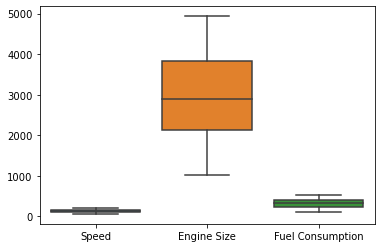

In [6]:
sns.boxplot(data=data);

# Model İşlemleri

In [7]:
# Bağımlı ve bağımsız değişkenleri oluşturalım.
X = data[['Speed', 'Engine Size']]
y = data['Fuel Consumption']

In [8]:
# Eğitim ve test setlerini ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Modeli oluşturalım ve eğitelim.
model = BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor()

In [10]:
# Tahmin Yapalım.
predict = model.predict(X_test)

In [11]:
# Modelin başarısını inceleyelim.
r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)

print('R^2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

R^2:  0.9834442466719883
MSE:  153.79850689424208
RMSE:  12.40155260014818


# Model Tuning 

In [12]:
model.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [13]:
params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

grid = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_

print('Best Parameters: ', best_params)
print('Best Score: ', grid.best_score_)

Best Parameters:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
Best Score:  0.9858362501266799


### En iyi hiperparametreler için modelimizi tekrar kuralım.

In [15]:
best_model = BaggingRegressor(**best_params).fit(X_train, y_train)
predict = best_model.predict(X_test)

r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)

print('R^2: ', r2)
print('MSE: ', mse)
print('RMSE: ', rmse)

R^2:  0.9823202131056109
MSE:  164.24047717386418
RMSE:  12.815634091759337


# Tahmin

In [16]:
data.head()

,Speed,Engine Size,Fuel Consumption
0,107,3826,401.319966
1,177,1086,152.024564
2,127,4115,446.372520
3,163,1872,218.249899
4,69,3059,325.840794


In [18]:
speed = int(input('Aracın ortalama hızını giriniz: '))
engine_size = int(input('Aracın motor hacmini giriniz: '))

predict = model.predict([[speed, engine_size]])

print('Tahmini Yakıt Tüketimi Değeri: ', int(predict))

Aracın ortalama hızını giriniz:  160
Aracın motor hacmini giriniz:  3000


Tahmini Yakıt Tüketimi Değeri:  332


C:\Users\murat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(
